In [ ]:
!pip install pandas matplotlib nltk wordcloud

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 加载数据
data = pd.read_csv('processed_with_doi.csv')
data.head()

,arXiv Code,Categories,Title,Abstract,Submission Date,Primary_Subclass,DOI
0,arXiv:1801.01549,"physics.gen-ph, doi, 10.1155/2018/4657079",Moving unstable particles and special relativity,In Poincare-Wigner-Dirac theory of relativisti...,20180101,physics.gen-ph,10.1155/2018/4657079
1,arXiv:1801.01173,"physics.ins-det, cond-mat.mes-hall, physics.op...",Optical vector network analysis of ultra-narro...,We present optical vector network analysis (OV...,20180101,physics.ins-det,10.1364/OL.43.000935
2,arXiv:1801.00549,"cond-mat.mtrl-sci, doi, 10.1039/C8NR00053K","The graphene/n-Ge(110) interface: structure, d...",The implementation of graphene in semiconducti...,20180101,cond-mat.mtrl-sci,10.1039/C8NR00053K
3,arXiv:1801.00547,"quant-ph, cond-mat.mes-hall, physics.optics, d...",Enhancement of the spontaneous emission in sub...,We consider a quantum-electrodynamic problem o...,20180101,quant-ph,10.1103/PhysRevA.97.043801
4,arXiv:1801.00546,"cond-mat.mtrl-sci, doi, 10.1063/1.5011112",Spectroscopic study of native defects in the s...,Vanadium is a transition metal with multiple o...,20180101,cond-mat.mtrl-sci,10.1063/1.5011112


     year  Primary_Subclass  counts
0    2018          astro-ph       6
1    2018       astro-ph.CO    1531
2    2018       astro-ph.EP    1434
3    2018       astro-ph.GA    3515
4    2018       astro-ph.HE    2305
..    ...               ...     ...
307  2023  physics.plasm-ph     409
308  2023    physics.pop-ph      19
309  2023    physics.soc-ph     319
310  2023  physics.space-ph      73
311  2023          quant-ph    4443

[312 rows x 3 columns]


<Figure size 1800x1300 with 0 Axes>

<Axes: xlabel='year', ylabel='counts'>

Text(0.5, 1.0, 'Trends in published articles by field (2018-2023)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of published articles')

([<matplotlib.axis.XTick at 0x19c8c3c5960>,
 [Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

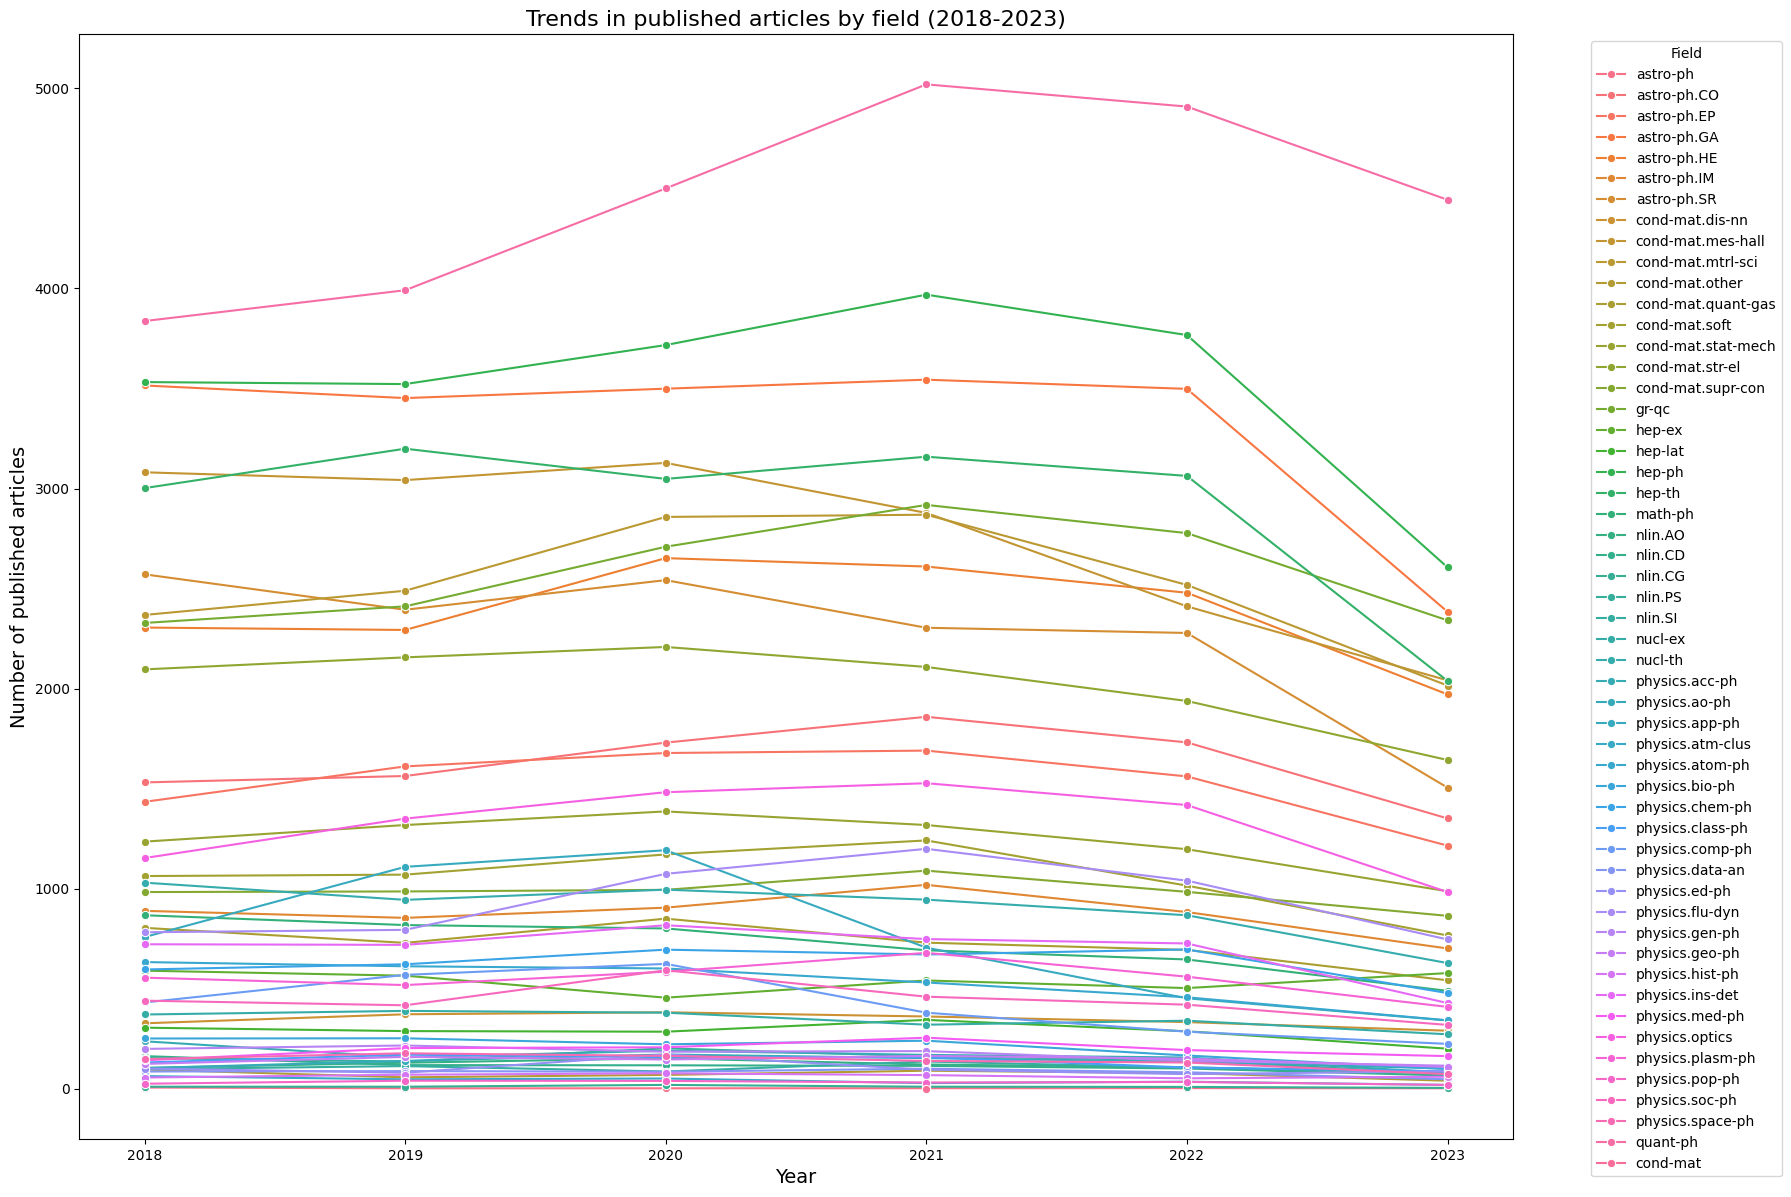

In [6]:
# 2. 数据预处理
# 确保年份是整数
data['year'] = data['Submission Date'].astype(str).str[:4].astype(int)

# 统计每个领域每年的文章数量
trend_data = data.groupby(['year', 'Primary_Subclass']).size().reset_index(name='counts')
print(trend_data.head())

# 3. 绘制趋势图
plt.figure(figsize=(18, 13))
sns.lineplot(data=trend_data, x='year', y='counts', hue='Primary_Subclass', marker='o')

# 设置图形标题和标签
plt.title('Trends in published articles by field (2018-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of published articles', fontsize=14)
plt.xticks(trend_data['year'].unique())
plt.legend(title='Field', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

  Primary_Subclass  counts
0      astro-ph.CO    1859
1      astro-ph.EP    1690
2      astro-ph.GA    3544
3      astro-ph.HE    2610
4      astro-ph.IM    1019


<Figure size 2400x1300 with 0 Axes>

<Axes: ylabel='counts'>

Text(0.5, 1.0, '2021 Number of published articles in each field')

Text(0.5, 0, 'Field')

Text(0, 0.5, 'Number of published articles')

([0], [Text(0, 0, '')])

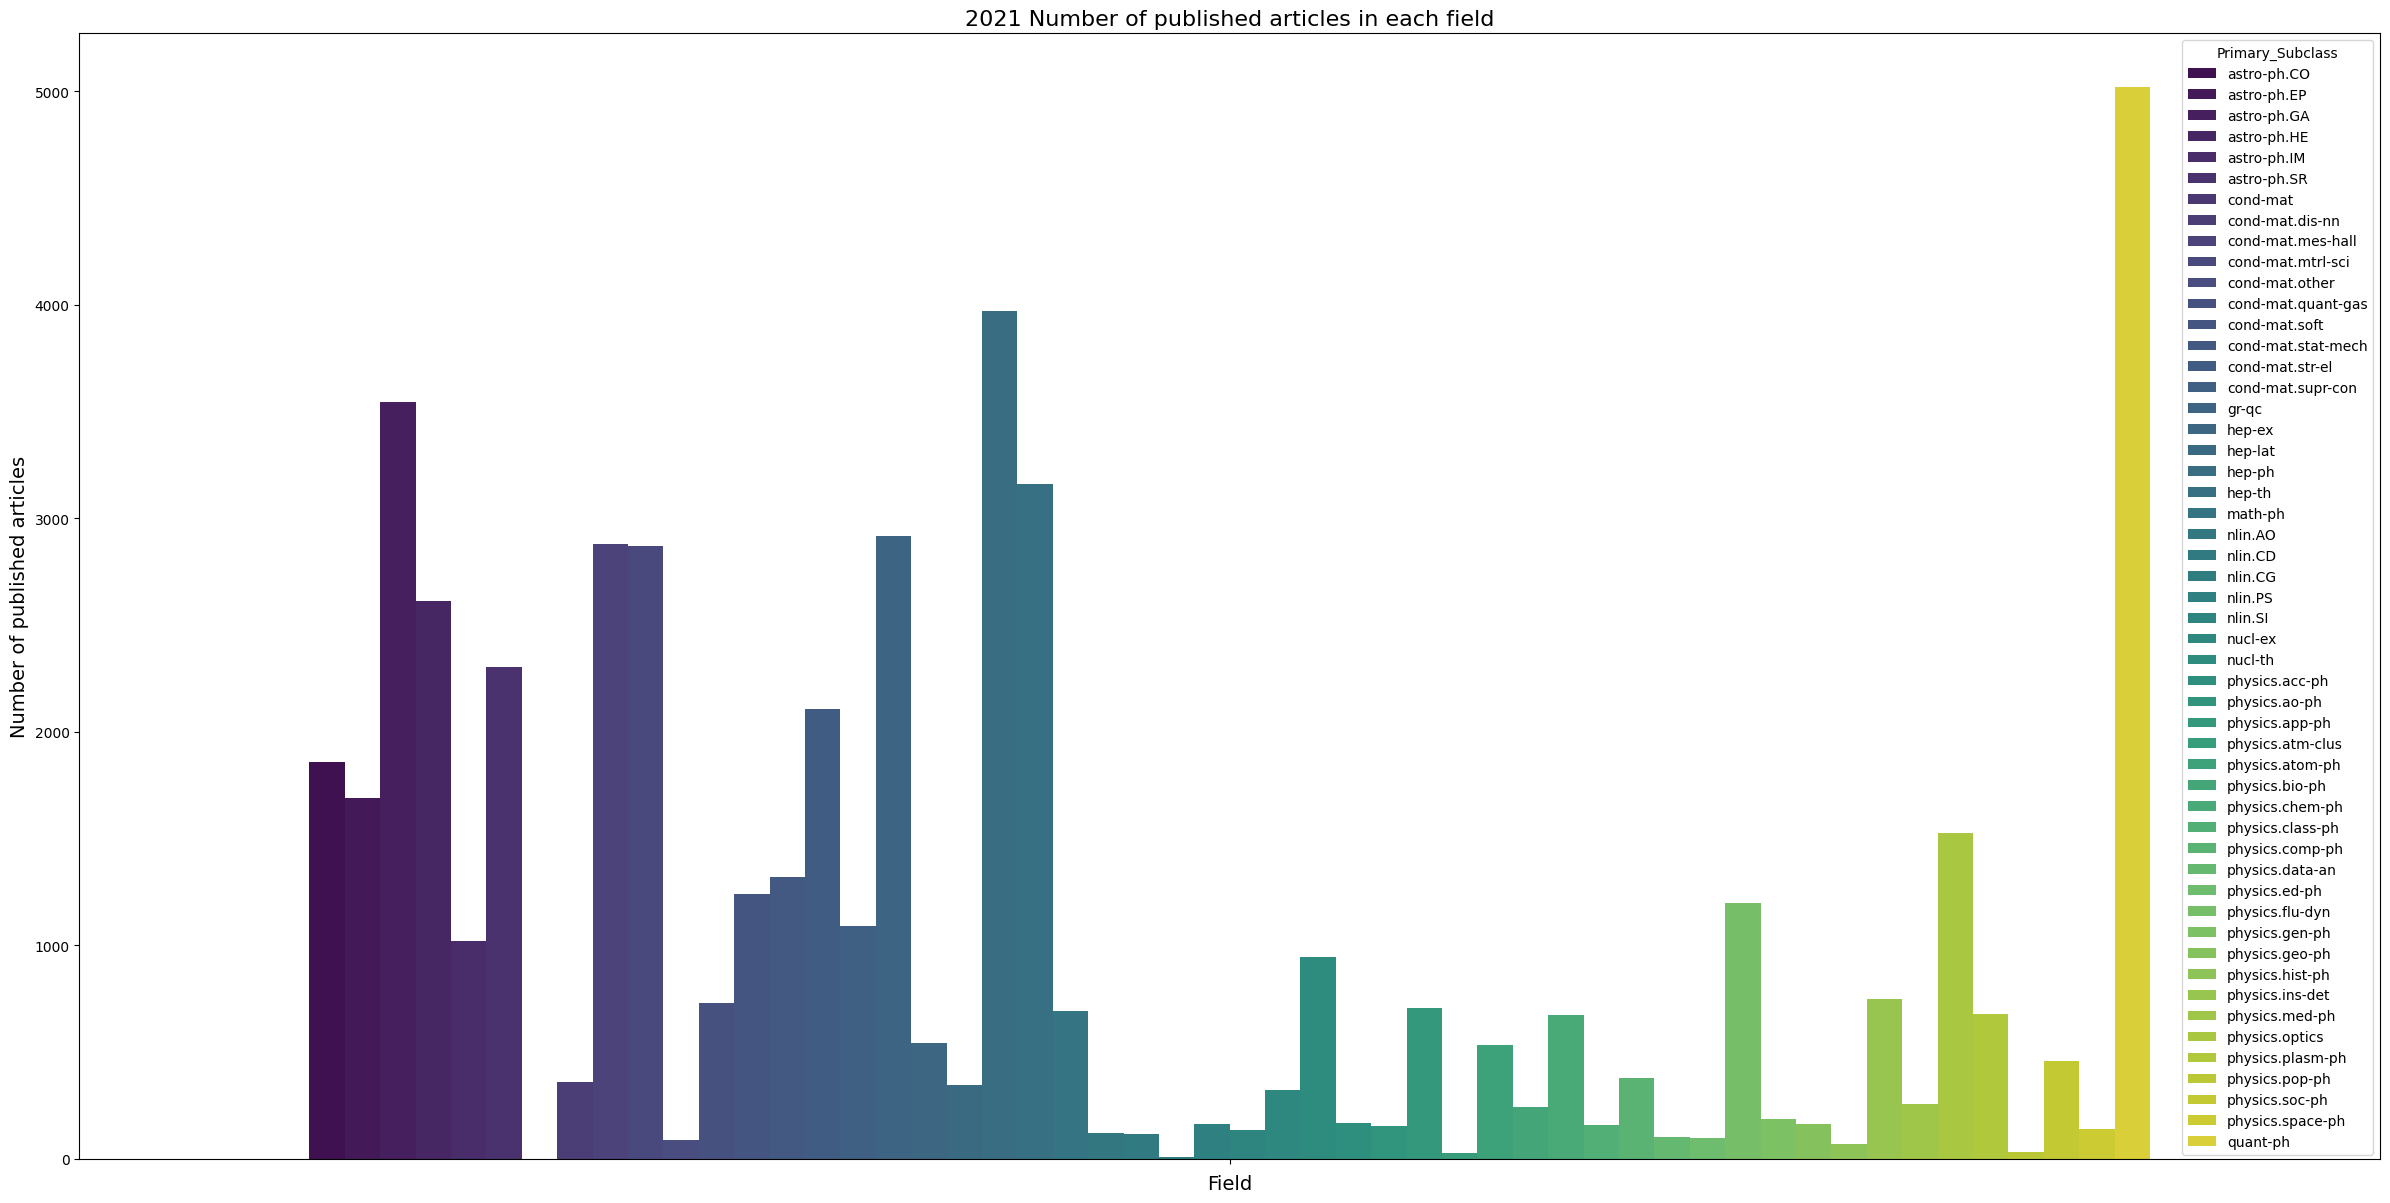

In [9]:
year_to_plot = 2021
filtered_data = data[data['year'] == year_to_plot]

# 4. 统计各领域的文章数量
counts = filtered_data.groupby('Primary_Subclass').size().reset_index(name='counts')
print(counts.head())

# 5. 绘制柱形图
plt.figure(figsize=(24,13))
sns.barplot(data=counts, hue='Primary_Subclass', y='counts', palette='viridis')

# 设置图形标题和标签
plt.title(f'{year_to_plot} Number of published articles in each field', fontsize=16)
plt.xlabel('Field', fontsize=14)
plt.ylabel('Number of published articles', fontsize=14)
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示

# 显示图形
plt.tight_layout()
plt.show()

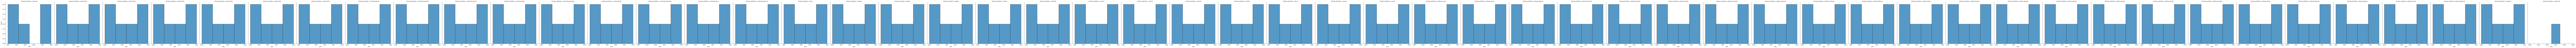

In [19]:
# 没想好画什么
g = sns.FacetGrid(trend_data, col="Primary_Subclass",height=6)
g.map(sns.histplot, "year")
g.figure.subplots_adjust(wspace=.02, hspace=.02)

    year   Primary_Subclass  counts
51  2018           quant-ph    3837
19  2018             hep-ph    3532
3   2018        astro-ph.GA    3515
8   2018  cond-mat.mes-hall    3081
20  2018             hep-th    3002


<Figure size 1600x1000 with 0 Axes>

<Axes: xlabel='year', ylabel='counts'>

Text(0.5, 1.0, 'Top 10 hot fields every year from 2018 to 2023')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of published articles')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022'),
  Text(5, 0, '2023')])

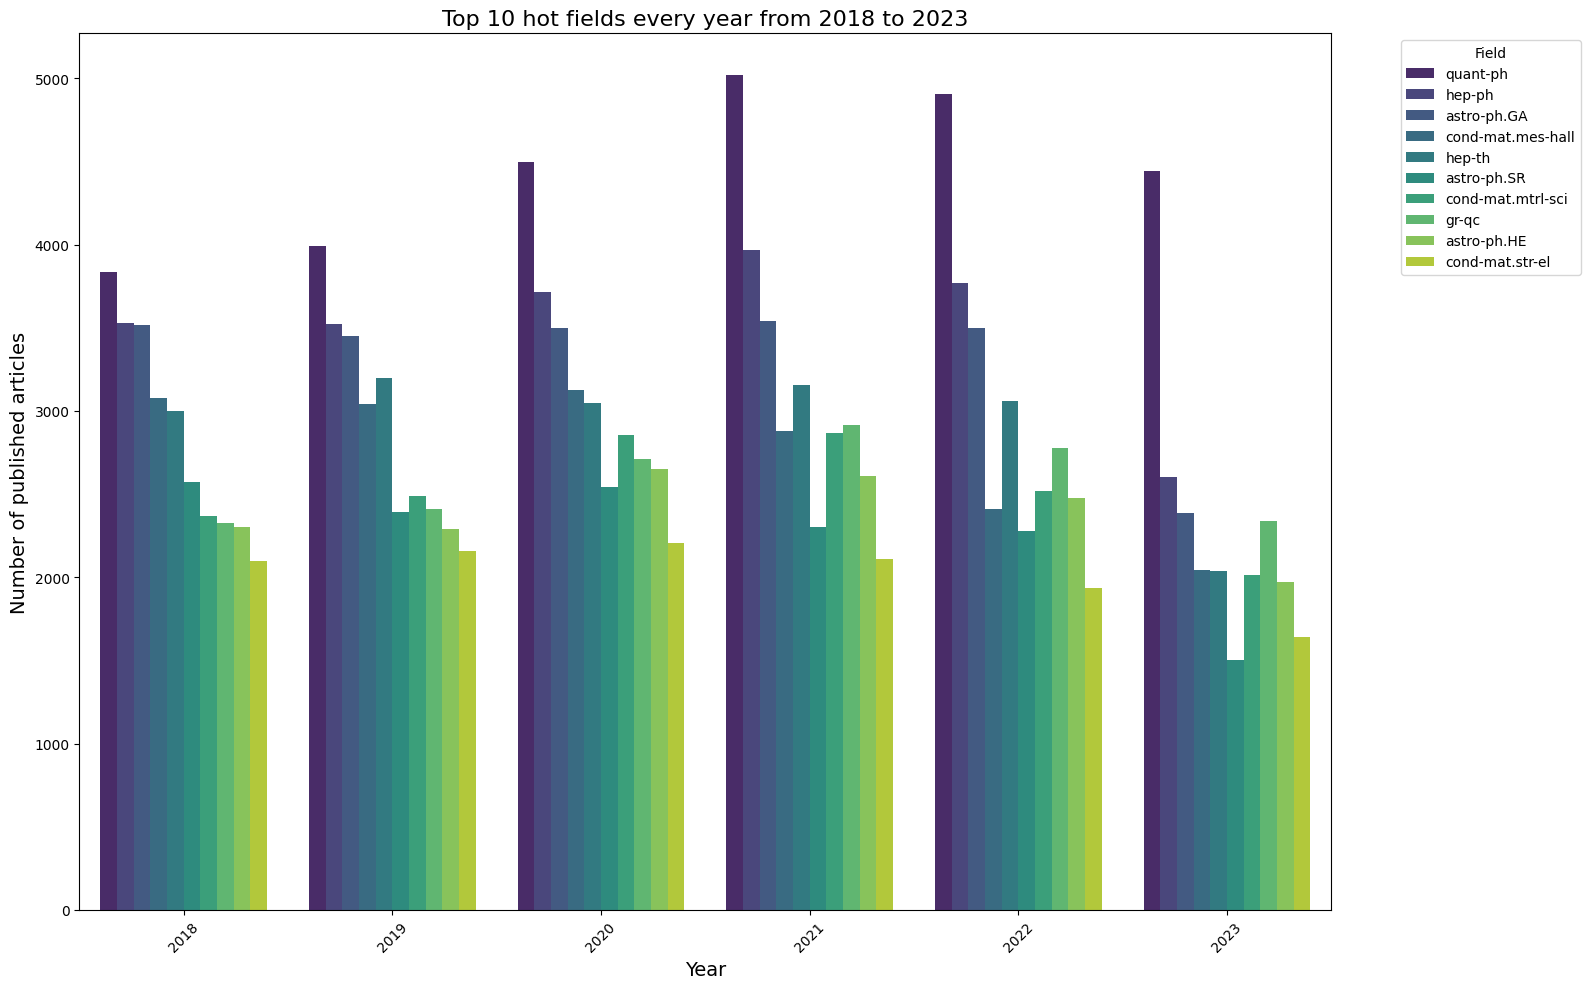

In [10]:
# 3. 获取每年 Top 10 热门领域
top10_yearly = (trend_data.sort_values(['year', 'counts'], ascending=[True, False])
                               .groupby('year')
                               .head(10))
print(top10_yearly.head())

# 4. 绘制柱形图
plt.figure(figsize=(16, 10))
sns.barplot(data=top10_yearly, x='year', y='counts', hue='Primary_Subclass', palette='viridis')

# 设置图形标题和标签
plt.title('Top 10 hot fields every year from 2018 to 2023', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of published articles', fontsize=14)
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示

# 调整图例位置
plt.legend(title='Field', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords as stps
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
customized_words = ["based"]
stopwords = set(stopwords_list.decode().splitlines() + customized_words)

# nltk.download('stopwords')
# stopwords = set(stps.words('english'))

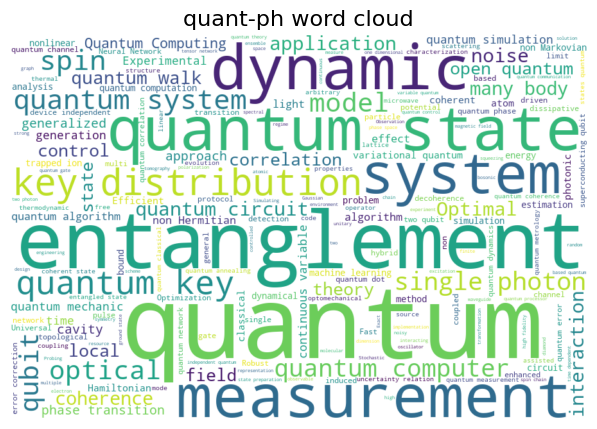

In [19]:
# 2. 去除停用词并生成词云
def generate_wordcloud_for_field(field):
    # 过滤出特定领域的数据
    field_data = data[data['Primary_Subclass'] == field]
    
    # 合并所有标题
    text = ' '.join(field_data['Title'].dropna())
    
    # 去除停用词
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    filtered_text = ' '.join(filtered_words)
    
    # 生成词云
    # 禁用词对 collocations=False
    wordcloud = WordCloud(width=900, height=600, background_color='white').generate(filtered_text)
    # wordcloud = WordCloud(width=900, height=600, background_color='white', stopwords=stopwords).generate(text)
    
    # 绘制词云
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{field} word cloud', fontsize=16)
    plt.show()
   

# 3. 生成各个领域的词云
# field = "quant-ph"
fields = data['Primary_Subclass'].unique()
for field in fields:
    generate_wordcloud_for_field(field)

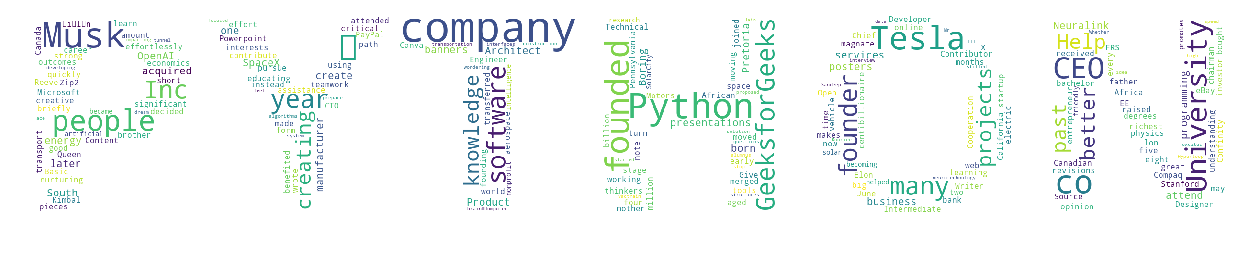

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# 生成一个简单的掩模，使用特定的单词
def create_mask(word):
    # 创建一个空白的图像
    fig, ax = plt.subplots(figsize=(1,1))  # 设置合适的尺寸
    ax.text(1,1, word, fontsize=400, fontweight='bold', ha='center', va='center', color='black')
    ax.axis('off')
    
    temp_mask_path = 'temp_mask.png'
    plt.savefig(temp_mask_path, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    # 读取掩模图像
    mask = np.array(Image.open(temp_mask_path))
    # 删除临时文件
    os.remove(temp_mask_path)
    
    return mask

# 创建词云
def generate_wordcloud(text, shape_word):
    mask = create_mask(shape_word)
    wordcloud = WordCloud(mask = mask, 
               background_color = "white",
               max_words = 2000,
               max_font_size = 500,
               random_state = 42, 
               width = mask.shape[1],
               height = mask.shape[0]).generate(text)

    plt.figure(figsize=(16, 10))
    plt.imshow(wordcloud, interpolation='None')
    plt.axis('off')
    plt.show()

# 示例文本和形状单词
text = "Python Developer with a strong understanding of both Basic and Intermediate Python.鈥� Many people have benefited from my assistance in learning Python quickly and effortlessly.\
鈥� Give them a path to learn Python in a short amount of time.鈥� For the past 1 Year, I've been working on projects in Python.Designer with good knowledge of software like Canva and Microsoft Powerpoint.\
鈥� Help many people in creating better presentations.鈥� Help many people in creating better posters and banners.鈥� For the past four months, I've been using these softwares to create presentations, posters, and banners.\
Technical Content Writer who wrote eight pieces and made five big revisions @GeeksforGeeks.Open Source Contributor who makes every effort to contribute to significant Python Projects.\
Cooperation and teamwork, in my opinion, are critical tools for educating and nurturing creative thinkers so that they may turn their interests into great outcomes.\
Elon Reeve Musk FRS (/藞i藧l蓲n/ EE-lon; born June 28, 1971) is an entrepreneur and business magnate. He is the founder, CEO, and Chief Engineer at SpaceX; early stage investor,[note 2] CEO, and Product Architect of Tesla, Inc.; founder of The Boring Company; and co-founder of Neuralink and OpenAI. A centibillionaire, Musk is one of the richest people in the world.\
Musk was born to a Canadian mother and South African father and raised in Pretoria, South Africa. He briefly attended the University of Pretoria before moving to Canada aged 17 to attend Queen's University. He transferred to the University of Pennsylvania two years later, where he received bachelor's degrees in economics and physics. He moved to California in 1995 to attend Stanford University but decided instead to pursue a business career, co-founding the web software company Zip2 with brother Kimbal. The startup was acquired by Compaq for $307 million in 1999. Musk co-founded online bank X.com that same year, which merged with Confinity in 2000 to form PayPal. The company was bought by eBay in 2002 for $1.5 billion.\
In 2002, Musk founded SpaceX, an aerospace manufacturer and space transport services company, of which he is CEO and CTO. In 2004, he joined electric vehicle manufacturer Tesla Motors, Inc. (now Tesla, Inc.) as chairman and product architect, becoming its CEO in 2008. In 2006, he helped create SolarCity, a solar energy services company that was later acquired by Tesla and became Tesla Energy. In 2015, he co-founded OpenAI, a nonprofit research company that promotes friendly artificial intelligence. In 2016, he co-founded Neuralink, a neurotechnology company focused on developing brain鈥揷omputer interfaces, and founded The Boring Company, a tunnel construction company. Musk has proposed the Hyperloop, a high-speed vactrain transportation system.\
With the idea of imparting programming knowledge, Mr. Sandeep Jain, an IIT Roorkee alumnus started a dream, GeeksforGeeks. Whether programming excites you or you feel stifled, wondering how to prepare for interview questions or how to ace data structures and algorithms, GeeksforGeeks is a one-stop solution."
shape_word = "PYTHON"

generate_wordcloud(text, shape_word)